created on 2/9/16 (bay is at shillington info session with bay; 5th week at sams; exploring OC SVM as it comes up frequently during my work on video anomaly detection for unclip; watching episode 6 of helix)

# OC-SVM explained

traditional SVM discriminates between two classes. this works well for well-defined and mutually exclusive classes - think snaps versus microflips. 

if classes are not well defined or well sampled, you care about one versus all. for example, instead of distinguishing between snaps versus flicks, you might only care about snaps versus non-snaps. however, there are infinite non-snaps, which means youll never have enough coverage. therefore the usual way of training a classifier will not work.

OCSVMs' idea is to find a function that is positive for regions with high density of points, and negative for small densities. the coordinate space is shifted so that the single positive example lies at the origin.


reference: 

* https://stats.stackexchange.com/questions/99162/explanation-on-one-class-svm
* https://stats.stackexchange.com/questions/63028/one-class-svm-vs-exemplar-svm
* http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn import svm

In [48]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

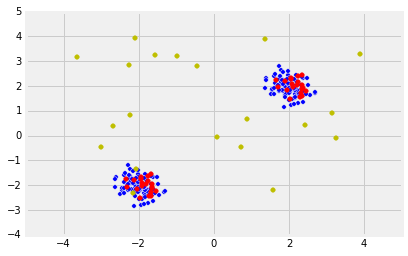

In [49]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_test[:,0], X_test[:,1], color = 'r')
plt.scatter(X_outliers[:,0], X_outliers[:,1], color = 'y')

In [50]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [51]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [52]:
X_new = np.concatenate([X_test, X_outliers])
X_new.shape

(60, 2)

In [53]:
y_new = np.concatenate([y_pred_test, y_pred_outliers])

In [54]:
X_new_classifiedasoutliers = X_new[y_new == -1]
X_new_classifiedasnormal = X_new[y_new == 1]

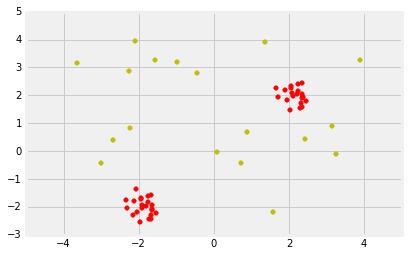

In [55]:
plt.scatter(X_new_classifiedasoutliers[:,0], X_new_classifiedasoutliers[:,1], color = 'y')
plt.scatter(X_new_classifiedasnormal[:,0], X_new_classifiedasnormal[:,1], color = 'red')